In [1]:
# SECCIÓN 1: CONFIGURACIÓN INICIAL E IMPORTACIÓN DE LIBRERÍAS
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 
tf.random.set_seed(42)

print("Librerías importadas y configuración inicial completada")


Librerías importadas y configuración inicial completada


In [3]:
# SECCIÓN 2: GENERACIÓN Y PREPARACIÓN DE DATOS

# Generamos datos sintético
X_np, y_np = make_moons(
    n_samples=1000,    
    noise=0.1,         
    random_state=42    
)

# Verificamos los datos generados
print("\n EXAMEN DE DATOS GENERADOS ")
print(f"Forma de X_np (características): {X_np.shape}")  # Debería ser (1000, 2)
print(f"Forma de y_np (etiquetas): {y_np.shape}")        # Debería ser (1000,)
print(f"Valores únicos en y_np: {np.unique(y_np)}")      # Debería ser [0, 1]

# Mostramos ejemplos de los datos
print("\nPrimeras 5 muestras de características (X):")
print(X_np[:5])

# Convertimos los arrays de NumPy a tensores de TensorFlow
X_train = tf.constant(X_np, dtype=tf.float32)          # Tensor de características
Y_train = tf.constant(y_np.reshape(-1, 1), dtype=tf.float32)  # Tensor de etiquetas 

print(f"\n CONVERSIÓN A TENSORES ")
print(f"Forma del Tensor X_train: {X_train.shape}")  



 EXAMEN DE DATOS GENERADOS 
Forma de X_np (características): (1000, 2)
Forma de y_np (etiquetas): (1000,)
Valores únicos en y_np: [0 1]

Primeras 5 muestras de características (X):
[[-0.05146968  0.44419863]
 [ 1.03201691 -0.41974116]
 [ 0.86789186 -0.25482711]
 [ 0.288851   -0.44866862]
 [-0.83343911  0.53505665]]

 CONVERSIÓN A TENSORES 
Forma del Tensor X_train: (1000, 2)


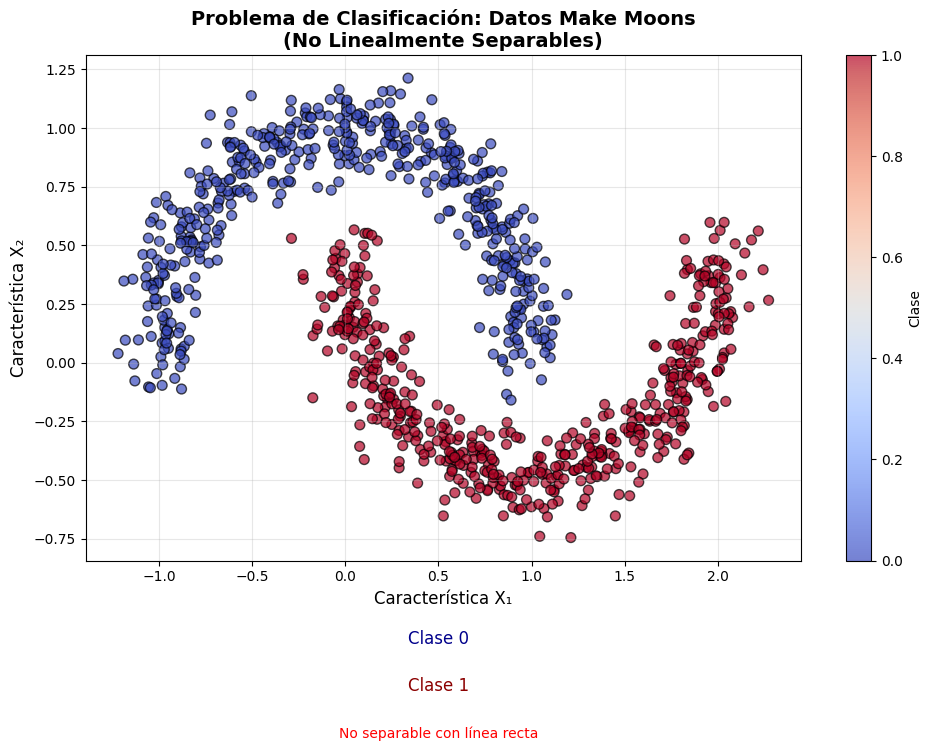


 Visualización completada - Los datos muestran patrones no lineales complejos


In [4]:
# SECCIÓN 3: VISUALIZACIÓN DE LOS DATOS

# Creamos una visualización de los datos
plt.figure(figsize=(10, 8))

# Scatter plot donde coloreamos según la clase (0 o 1)
scatter = plt.scatter(X_np[:, 0],   
                     X_np[:, 1],     
                     c=y_np,       
                     cmap='coolwarm',
                     alpha=0.7,    
                     edgecolors='black', 
                     s=50) 

# Configuramos el gráfico
plt.colorbar(scatter, label='Clase')
plt.title('Problema de Clasificación: Datos Make Moons\n(No Linealmente Separables)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Característica X₁', fontsize=12)
plt.ylabel('Característica X₂', fontsize=12)
plt.grid(True, alpha=0.3)

# Añadimos anotaciones explicativas
plt.text(0.5, -1.2, 'Clase 0', fontsize=12, ha='center', color='darkblue')
plt.text(0.5, -1.4, 'Clase 1', fontsize=12, ha='center', color='darkred')
plt.text(0.5, -1.6, 'No separable con línea recta', fontsize=10, ha='center', color='red')

plt.tight_layout()
plt.show()

print("\n Visualización completada - Los datos muestran patrones no lineales complejos")


In [5]:
# SECCIÓN 4: DEFINICIÓN DE LA ARQUITECTURA DEL PERCEPTRÓN MULTICAPA (MLP)

# Creamos un modelo 
model = keras.Sequential([
    # CAPA OCULTA 1
    keras.layers.Dense(
        units=10,              
        activation='relu',      
        input_shape=(2,)        
        # name='capa_oculta_1'  # Nombre opcional para la capa
    ),

    # CAPA OCULTA 2
    keras.layers.Dense(
        units=10,               # Otras 10 neuronas
        activation='relu',      # ReLU para no-linealidad
        # name='capa_oculta_2'
    ),

     # CAPA DE SALIDA
    keras.layers.Dense(
        units=1,              
        activation='sigmoid'    
        # name='capa_salida'
    )
])

# Mostramos resumen detallado de la arquitectura
print("\nRESUMEN DE LA ARQUITECTURA DEL MODELO")
model.summary()

# Información adicional sobre parámetros
print("\n ANÁLISIS DE PARÁMETROS")
total_params = model.count_params()
print(f"Total de parámetros entrenables: {total_params:,}")



RESUMEN DE LA ARQUITECTURA DEL MODELO


c:\Users\Maeva\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)


 ANÁLISIS DE PARÁMETROS
Total de parámetros entrenables: 151


In [6]:
# SECCIÓN 5: COMPILACIÓN DEL MODELO

# Compilamos el modelo - configura el proceso de aprendizaje
model.compile(
    optimizer='adam',           # Optimizador Adam (variante de descenso de gradiente)
    loss='binary_crossentropy', # Pérdida para clasificación binaria
    metrics=['accuracy']        # Seguimos la precisión durante entrenamiento
)

print("Modelo compilado exitosamente")

Modelo compilado exitosamente


In [7]:
# SECCIÓN 6: ENTRENAMIENTO DEL MODELO

# Entrenamos el modelo
history = model.fit(
    X_train,      # Tensor de características de entrenamiento
    Y_train,      # Tensor de etiquetas de entrenamiento
    epochs=100,           # 100 pasadas completas sobre el dataset
    batch_size=32,        # 32 muestras por lote 
    verbose=1,            # 1 = muestra barra de progreso por época
    validation_split=0.2  # Usa 20% de datos 
)

# Extraemos la precisión final del historial
final_accuracy = history.history['accuracy'][-1]
final_loss = history.history['loss'][-1]

print("\nEntrenamiento completado exitosamente")
print(f"\n RESULTADOS FINALES DEL ENTRENAMIENTO ")
print(f" Precisión final alcanzada: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f" Pérdida final: {final_loss:.4f}")

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5288 - loss: 0.6985 - val_accuracy: 0.5750 - val_loss: 0.6595
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6963 - loss: 0.6337 - val_accuracy: 0.8400 - val_loss: 0.6073
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8413 - loss: 0.5884 - val_accuracy: 0.8350 - val_loss: 0.5698
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.5513 - val_accuracy: 0.8250 - val_loss: 0.5362
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8375 - loss: 0.5151 - val_accuracy: 0.8150 - val_loss: 0.5022
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8363 - loss: 0.4784 - val_accuracy: 0.8150 - val_loss: 0.4683
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8350 - loss: 0.4425 - val_accuracy: 0.8150 - val_loss: 0.4358
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8388 - loss: 0.4091 - val_accuracy: 0.8250 - 

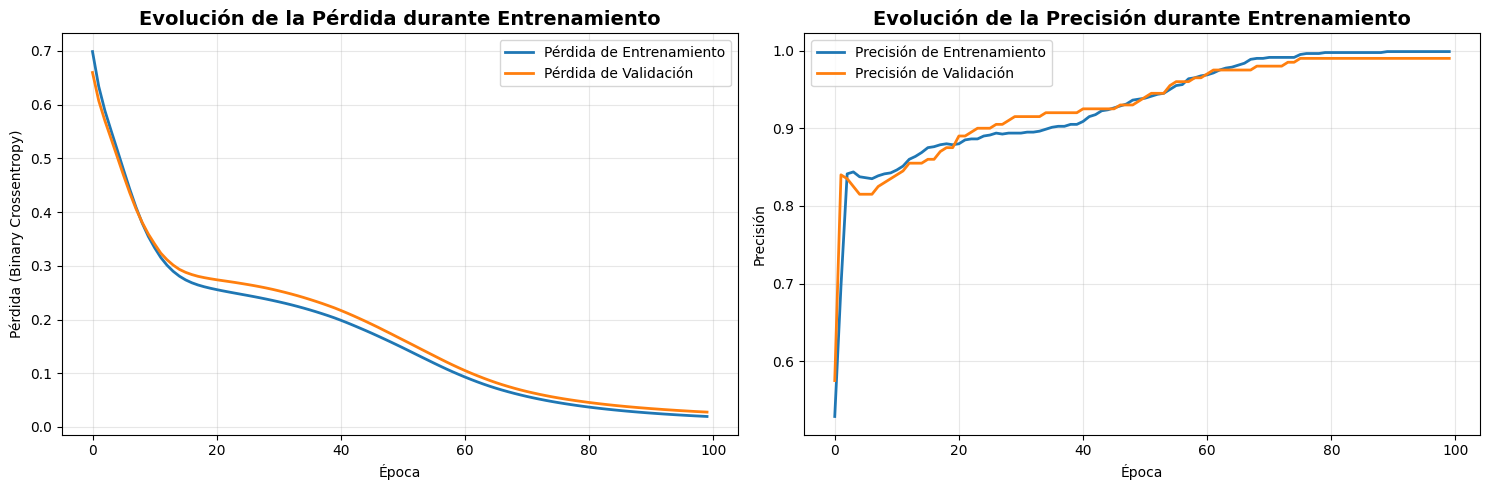

In [8]:
# SECCIÓN 7: EVALUACIÓN Y ANÁLISIS DEL ENTRENAMIENTO 

# Creamos gráficos para analizar el entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Pérdida durante entrenamiento
ax1.plot(history.history['loss'], label='Pérdida de Entrenamiento', linewidth=2)
if 'val_loss' in history.history:
    ax1.plot(history.history['val_loss'], label='Pérdida de Validación', linewidth=2)
ax1.set_title('Evolución de la Pérdida durante Entrenamiento', fontsize=14, fontweight='bold')
ax1.set_xlabel('Época')
ax1.set_ylabel('Pérdida (Binary Crossentropy)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Precisión durante entrenamiento
ax2.plot(history.history['accuracy'], label='Precisión de Entrenamiento', linewidth=2)
if 'val_accuracy' in history.history:
    ax2.plot(history.history['val_accuracy'], label='Precisión de Validación', linewidth=2)
ax2.set_title('Evolución de la Precisión durante Entrenamiento', fontsize=14, fontweight='bold')
ax2.set_xlabel('Época')
ax2.set_ylabel('Precisión')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# SECCIÓN 8: PREDICCIÓN CON EL MODELO ENTRENADO

# Ejemplo 1: Punto que probablemente pertenece a la clase 0 (zona inferior)  
new_point_1 = tf.constant([[-1.0, 0.0]], dtype=tf.float32) # Coordenadas (x=-1.0, y=0.0)

# Ejemplo 2: Punto en zona de decisión (difícil de clasificar)
new_point_2 = tf.constant([[0.0, 0.0]], dtype=tf.float32)  # Coordenadas (x=0.0, y=0.0)

prediction_1 = model.predict(new_point_1, verbose=0)
prediction_2 = model.predict(new_point_2, verbose=0)

# Función auxiliar para interpretar predicciones
def interpret_prediction(probabilidad, punto):
    """Interpreta la probabilidad y devuelve clase y confianza"""
    clase = 1 if probabilidad > 0.5 else 0
    confianza = probabilidad if clase == 1 else 1 - probabilidad
    return clase, confianza

clase_1, confianza_1 = interpret_prediction(prediction_1[0][0], new_point_1) 
clase_2, confianza_2 = interpret_prediction(prediction_2[0][0], new_point_2)


print(f"\nPunto [-1.0, 0.0]:")
print(f"   Probabilidad: {prediction_1[0][0]:.4f}") 
print(f"   Clase predicha: {clase_1}")
print(f"   Confianza: {confianza_1*100:.1f}%")
print(f"   Interpretación: {'Clase 1' if clase_1 == 1 else 'Clase 0 (Alta probabilidad)'}")

print(f"\nPunto [0.0, 0.0]:")
print(f"   Probabilidad: {prediction_2[0][0]:.4f}")
print(f"   Clase predicha: {clase_2}")
print(f"   Confianza: {confianza_2*100:.1f}%")
print(f"   Interpretación: {'Zona de decisión - Clasificación incierta' if confianza_2 < 0.7 else 'Clasificación confiable'}")



Punto [-1.0, 0.0]:
   Probabilidad: 0.0188
   Clase predicha: 0
   Confianza: 98.1%
   Interpretación: Clase 0 (Alta probabilidad)

Punto [0.0, 0.0]:
   Probabilidad: 0.9952
   Clase predicha: 1
   Confianza: 99.5%
   Interpretación: Clasificación confiable


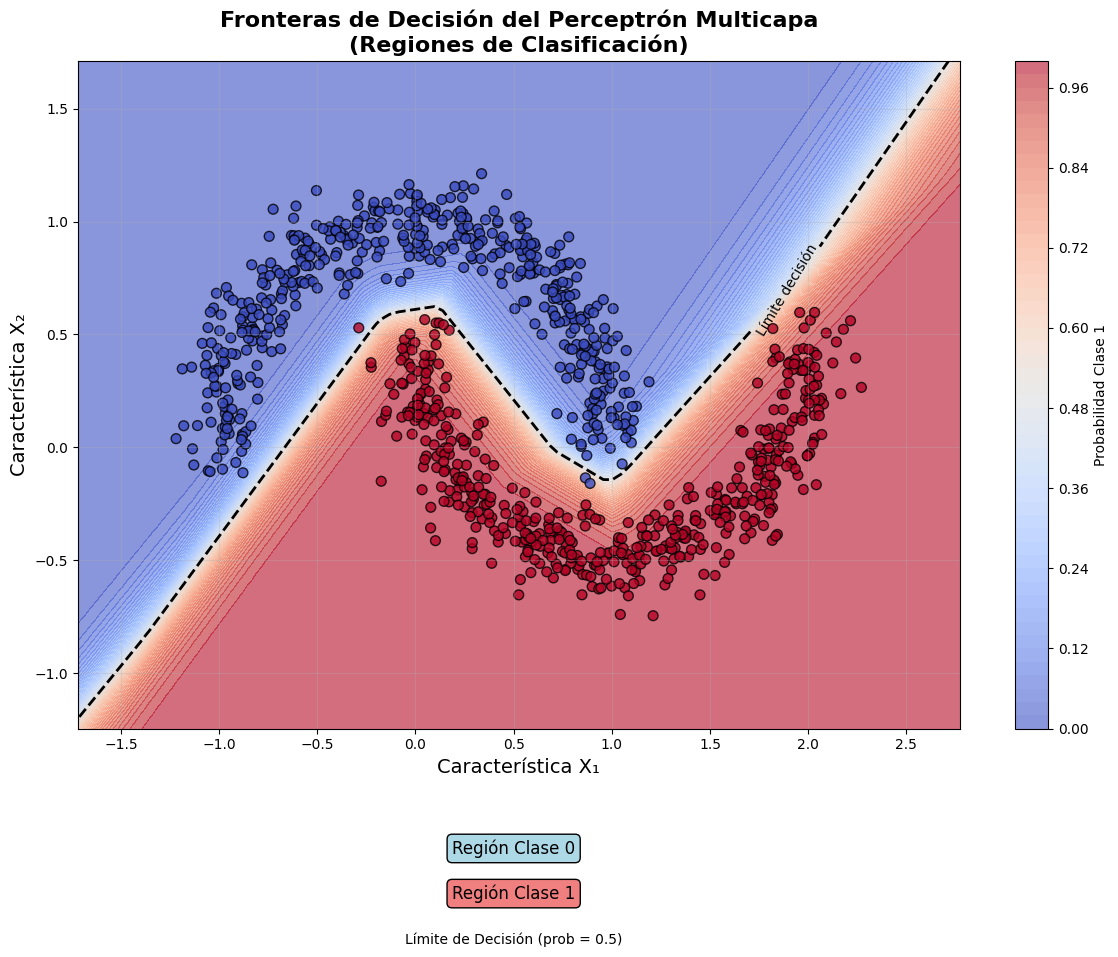

In [11]:
# SECCIÓN 9: VISUALIZACIÓN DE FRONTERAS DE DECISIÓN


# Creamos una malla de puntos que cubra todo el espacio de características
x_min, x_max = X_np[:, 0].min() - 0.5, X_np[:, 0].max() + 0.5
y_min, y_max = X_np[:, 1].min() - 0.5, X_np[:, 1].max() + 0.5

# Resolución de la malla (mayor resolución = más detalle pero más computación)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predecir la clase para cada punto en la malla
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_tensor = tf.constant(mesh_points, dtype=tf.float32)
Z = model.predict(mesh_tensor, verbose=0)
Z = Z.reshape(xx.shape)

# Crear la visualización
plt.figure(figsize=(12, 10))

# Graficar el fondo con las regiones de decisión
contour = plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm', levels=50)
plt.colorbar(contour, label='Probabilidad Clase 1')

# Graficar los datos originales
scatter = plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap='coolwarm', 
                     edgecolors='black', s=50, alpha=0.8)

# Línea de contorno de decisión (probabilidad = 0.5)
decision_boundary = plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, 
                               colors='black', linestyles='dashed')
plt.clabel(decision_boundary, inline=True, fontsize=10, fmt='Límite decisión')

# Configuración del gráfico
plt.title('Fronteras de Decisión del Perceptrón Multicapa\n(Regiones de Clasificación)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Característica X₁', fontsize=14)
plt.ylabel('Característica X₂', fontsize=14)
plt.grid(True, alpha=0.3)

# Añadir anotaciones explicativas
plt.text(0.5, -1.8, 'Región Clase 0', fontsize=12, ha='center', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(0.5, -2.0, 'Región Clase 1', fontsize=12, ha='center', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
plt.text(0.5, -2.2, 'Límite de Decisión (prob = 0.5)', fontsize=10, ha='center')

plt.tight_layout()
plt.show()
